#**TensorFlow Tensors, Keras Functional API, Model Save & Restore (MNIST Version)**

## 1. Tensor Basics

In [2]:
import tensorflow as tf

# Create tensors
scalar = tf.constant(7)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])

print("Scalar:", scalar.numpy())
print("Vector:", vector.numpy())
print("Matrix:\n", matrix.numpy())

# Tensor operations
added = tf.add(vector, [4, 5, 6])
subtracted = tf.subtract(vector, [1, 1, 1])
multiplied = tf.multiply(matrix, 2)
divided = tf.divide(matrix, 2)

# Matrix multiplication
matmul_result = tf.matmul(matrix, [[5, 6], [7, 8]])

# Element-wise power
powered = tf.pow(matrix, 2)

# Transpose
transposed = tf.transpose(matrix)

# Reshape
reshaped = tf.reshape(matrix, [4, 1])

# Reduction operations
sum_all = tf.reduce_sum(matrix)
mean_all = tf.reduce_mean(tf.cast(matrix, tf.float32))
max_val = tf.reduce_max(matrix)
min_val = tf.reduce_min(matrix)

# Broadcasting example
broadcast_add = tf.add(matrix, [[10], [20]])

# Display results
print("\nAdded vector:", added.numpy())
print("Subtracted vector:", subtracted.numpy())
print("Multiplied matrix:\n", multiplied.numpy())
print("Divided matrix:\n", divided.numpy())
print("Matrix multiplication:\n", matmul_result.numpy())
print("Powered matrix:\n", powered.numpy())
print("Transposed matrix:\n", transposed.numpy())
print("Reshaped matrix:\n", reshaped.numpy())
print("Sum of all elements:", sum_all.numpy())
print("Mean of all elements:", mean_all.numpy())
print("Max value:", max_val.numpy())
print("Min value:", min_val.numpy())
print("Broadcast addition:\n", broadcast_add.numpy())


Scalar: 7
Vector: [1 2 3]
Matrix:
 [[1 2]
 [3 4]]

Added vector: [5 7 9]
Subtracted vector: [0 1 2]
Multiplied matrix:
 [[2 4]
 [6 8]]
Divided matrix:
 [[0.5 1. ]
 [1.5 2. ]]
Matrix multiplication:
 [[19 22]
 [43 50]]
Powered matrix:
 [[ 1  4]
 [ 9 16]]
Transposed matrix:
 [[1 3]
 [2 4]]
Reshaped matrix:
 [[1]
 [2]
 [3]
 [4]]
Sum of all elements: 10
Mean of all elements: 2.5
Max value: 4
Min value: 1
Broadcast addition:
 [[11 12]
 [23 24]]


## 2. Tensor Fundamentals — Shapes, Dtypes, and Gradients

In [3]:
import numpy as np

a = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)
b = tf.constant([[0.5, 0.25], [0.75, 1.0]], dtype=tf.float32)
c = tf.convert_to_tensor(np.arange(12).reshape(3, 4), dtype=tf.float32)

print('Tensor a:', a)
print('Tensor b dtype:', b.dtype, 'shape:', b.shape)
print('Tensor c shape & values:\n', c.numpy())

# Broadcasting example
x = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[5.], [6.]])  # Will broadcast to match x's shape

print('x + y (broadcasted):\n', (x + y).numpy())
print('Matrix multiplication (x @ x):\n', tf.matmul(x, x).numpy())

# Gradient example
x_var = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
    y_grad = tf.reduce_sum(x_var ** 2)
dy_dx = tape.gradient(y_grad, x_var)
print('dy/dx =\n', dy_dx.numpy())

Tensor a: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor b dtype: <dtype: 'float32'> shape: (2, 2)
Tensor c shape & values:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
x + y (broadcasted):
 [[ 6.  7.]
 [ 9. 10.]]
Matrix multiplication (x @ x):
 [[ 7. 10.]
 [15. 22.]]
dy/dx =
 [[2. 4.]
 [6. 8.]]


## 3. Build MNIST Model using Keras Functional API

Model: "mnist_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8095 - loss: 0.6373 - val_accuracy: 0.9662 - val_loss: 0.1203
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9449 - loss: 0.1885 - val_accuracy: 0.9733 - val_loss: 0.0966
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9585 - loss: 0.1375 - val_accuracy: 0.9735 - val_loss: 0.0842
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9627 - loss: 0.1168 - val_accuracy: 0.9752 - val_loss: 0.0782
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9697 - loss: 0.0953 - val_accuracy: 0.9782 - val_loss: 0.0769
313/313 - 1s - 3ms/step - accuracy: 0.9735 - loss: 0.0869
Test accuracy: 0.9735


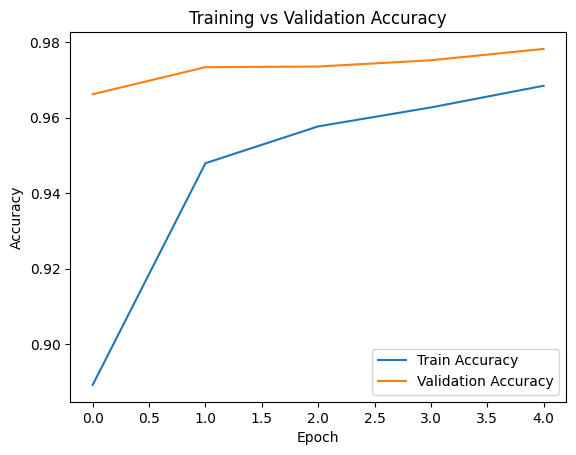

In [5]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build model
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_functional_model')
model.summary()

# Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 4. Save and Restore Models

In [9]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
save_path = '/content/drive/MyDrive/model.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

# Load the model to Google Drive
load_path = '/content/drive/MyDrive/model.keras'
loaded_model = keras.models.load_model(load_path)
print(' Model loaded successfully from Drive.')

Mounted at /content/drive
 Model saved successfully to /content/drive/MyDrive/model.keras
 Model loaded successfully from Drive.


## 5. Model Checkpoints

In [10]:
import os

save_dir = os.path.dirname(save_path)
checkpoint_path = os.path.join(save_dir, 'training_checkpoints', 'cp.weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              verbose=1,
                                              save_freq='epoch')

# Train again for demonstration
model.fit(x_train, y_train, epochs=2, batch_size=64, callbacks=[cp_callback])

latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print('Latest checkpoint:', latest_checkpoint)

if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Restored checkpoint model accuracy: {acc:.4f}")
else:
    print("No checkpoint found in the specified directory.")

Epoch 1/2
933/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.0918
Epoch 1: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9710 - loss: 0.0918
Epoch 2/2
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.0867
Epoch 2: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9725 - loss: 0.0867
Latest checkpoint: None
No checkpoint found in the specified directory.


# 6. Exercises

### 1. Add Batch Normalization layers and compare accuracy

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

# Build model with Batch Normalization
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)   # Added
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)   # Added
outputs = layers.Dense(10, activation='softmax')(x)

model_bn = keras.Model(inputs, outputs, name='mnist_bn_model')

model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history_bn = model_bn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

test_loss, test_acc = model_bn.evaluate(x_test, y_test)
print(f"Test accuracy with Batch Normalization: {test_acc:.4f}")


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8261 - loss: 0.5760 - val_accuracy: 0.9650 - val_loss: 0.1202
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9435 - loss: 0.1869 - val_accuracy: 0.9720 - val_loss: 0.0894
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9556 - loss: 0.1433 - val_accuracy: 0.9730 - val_loss: 0.0903
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9631 - loss: 0.1187 - val_accuracy: 0.9793 - val_loss: 0.0696
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9661 - loss: 0.1081 - val_accuracy: 0.9787 - val_loss: 0.0702
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0901
Test accuracy with Batch Normalization: 0.9749


### 2. Try using SGD and RMSprop optimizers

In [12]:
optimizers = {
    'Adam': keras.optimizers.Adam(),
    'SGD': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001)
}

for name, opt in optimizers.items():
    print(f"\n=== Training with {name} Optimizer ===")
    model_opt = keras.models.clone_model(model_bn)  # Reuse same architecture
    model_opt.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    model_opt.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=1)
    _, acc = model_opt.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f}")



=== Training with Adam Optimizer ===
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8281 - loss: 0.5623 - val_accuracy: 0.9692 - val_loss: 0.1118
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9434 - loss: 0.1851 - val_accuracy: 0.9707 - val_loss: 0.0985
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9574 - loss: 0.1400 - val_accuracy: 0.9795 - val_loss: 0.0752
Adam Test Accuracy: 0.9729

=== Training with SGD Optimizer ===
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8315 - loss: 0.5482 - val_accuracy: 0.9628 - val_loss: 0.1266
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9394 - loss: 0.2007 - val_accuracy: 0.9712 - val_loss: 0.1003
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9514 - loss: 0.1608 - val_accuracy: 0.9757 - val_loss: 0.0835
SGD Test Accuracy: 0.9709

=== Training with RMSprop Optimizer ===
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8479

### 3. Add a skip connection between layers in the model

In [13]:
# Skip connection model
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
dense1 = layers.Dense(128, activation='relu')(x)
dense2 = layers.Dense(64, activation='relu')(dense1)
skip_added = layers.add([dense2, layers.Dense(64, activation='relu')(dense1)])  # Skip connection
outputs = layers.Dense(10, activation='softmax')(skip_added)

model_skip = keras.Model(inputs, outputs, name='mnist_skip_model')

model_skip.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_skip = model_skip.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
test_loss, test_acc = model_skip.evaluate(x_test, y_test)
print(f"Test accuracy with Skip Connection: {test_acc:.4f}")


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8554 - loss: 0.4890 - val_accuracy: 0.9667 - val_loss: 0.1129
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9657 - loss: 0.1125 - val_accuracy: 0.9712 - val_loss: 0.0912
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9778 - loss: 0.0714 - val_accuracy: 0.9768 - val_loss: 0.0774
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9832 - loss: 0.0548 - val_accuracy: 0.9787 - val_loss: 0.0740
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9788 - val_loss: 0.0816
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1019
Test accuracy with Skip Connection: 0.9756


### 4. Save and restore only the weights instead of the full model

In [14]:
# Save only weights
weights_path = 'mnist_weights_only.weights.h5'
model_bn.save_weights(weights_path)
print(f"Weights saved to {weights_path}")

# Create a new model with same architecture
model_reloaded = keras.models.clone_model(model_bn)
model_reloaded.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Load saved weights
model_reloaded.load_weights(weights_path)
print("Weights loaded successfully.")

# Evaluate reloaded model
loss, acc = model_reloaded.evaluate(x_test, y_test)
print(f"Restored Weights Model Accuracy: {acc:.4f}")


Weights saved to mnist_weights_only.weights.h5
Weights loaded successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0901
Restored Weights Model Accuracy: 0.9749
